In [47]:
%pylab notebook
from serial import Serial
from PIL import Image
from threading import Thread
from io import BytesIO

def to888(arr565):
    H = arr565.shape[0]
    W = arr565.shape[1]
    img888 = zeros((H, W, 3), dtype=uint8)
    img888[:, :, 0] = (arr565 >> 11) << 3
    img888[:, :, 1] = ((arr565 >> 5) & 0x3F) << 2
    img888[:, :, 2] = (arr565 & 0x1F) << 3
    return img888

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Serial(port='/dev/ttyUSB0', baudrate=1000000)

# Find a way to read and display RGB565 data

b'gain:  5.745 dB,  exposure: 240380\nimagedata\n'


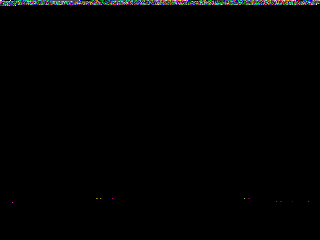

In [33]:
W = 320
H = 240
headerDat = s.read_until(b'imagedata\n')
print(headerDat)
imgDat = s.read(W * H * 2)
img565 = frombuffer(imgDat, dtype=uint16).byteswap().reshape(H, W)
img = Image.fromarray(to888(img565), 'RGB')
img

# decode jpeg

b'gain:  5.745 dB,  exposure: 240380\nimagedata\n'


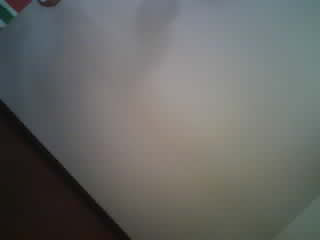

In [85]:
headerDat = s.read_until(b'imagedata\n')
print(headerDat[:100])
imgDat = s.read(6000)
f_imgDat = BytesIO(imgDat)
img = Image.open(f_imgDat)
img

# Auto-refresh a plot

<IPython.core.display.Javascript object>


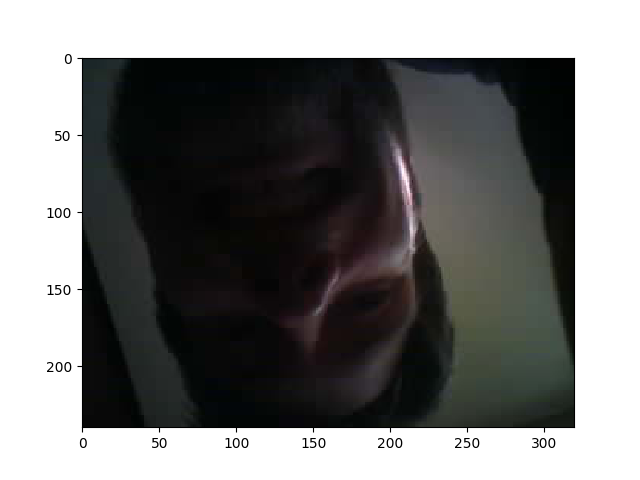

In [106]:
W = 320
H = 240
FMT = 'jpeg'
fig, axs = subplots()
l = axs.imshow(zeros((H, W)))
s = Serial(port='/dev/ttyUSB0', baudrate=1000000)
def read_from_port():
    while s.isOpen():
        headerDat = s.read_until(b'imagedata\n')
        print(headerDat[:100])
        if FMT == 'rgb565':
            imgDat = s.read(W * H * 2)
            img565 = frombuffer(imgDat, dtype=uint16).byteswap().reshape(H, W)
            # Update plot
            l.set_data(to888(img565))
        elif FMT == 'jpeg':
            imgDat = s.read_until(b'finito!\n')
            f_imgDat = BytesIO(imgDat)
            img = Image.open(f_imgDat)
            l.set_data(img)
        fig.canvas.draw_idle()
    print("DONE!")
t = Thread(target=read_from_port)
t.start()

In [107]:
s.close()

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-106-59ca45265db2>", line 17, in read_from_port
    imgDat = s.read_until(b'finito!\n')
  File "/usr/local/lib/python3.7/dist-packages/serial/serialutil.py", line 659, in read_until
    c = self.read(1)
  File "/usr/local/lib/python3.7/dist-packages/serial/serialposix.py", line 493, in read
    buf = os.read(self.fd, size - len(read))
TypeError: an integer is required (got type NoneType)

